<a href="https://colab.research.google.com/github/majoGel/GProjects/blob/main/ReportTerna_OffertaAccettata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
analysis_week = 6

#**DATA LOADING**

In [21]:
import datetime
import pandas as pd
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# Specifica il percorso del file Excel
#file_path = '/content/drive/My Drive/Progetti/2018_W6_GME.xlsx'
file_path = f'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2018_W{str(analysis_week)}_GME.xlsx'

excel_file = pd.ExcelFile(file_path)
formatted_days = list(map(lambda d: datetime.datetime.strptime(d, '%Y%m%d').strftime('%d/%m/%y'), excel_file.sheet_names))
print(f"Giorni analizzati:{formatted_days}")
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = excel_file.parse(sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

df = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
df = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(df.head())


Giorni analizzati:['05/02/18', '06/02/18', '07/02/18', '08/02/18', '09/02/18', '10/02/18', '11/02/18']


In [4]:
#Import WoW dataset
# Specifica il percorso del file Excel
file_path = f'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2018_W{str(analysis_week-1)}_GME.xlsx'

# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

WoWdf = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
WoWdf = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(WoWdf.head())

In [5]:
#Import YoY dataset
# Specifica il percorso del file Excel
file_path = f'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2017_W{str(analysis_week)}_GME.xlsx'

# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

YoYdf = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
YoYdf = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(YoYdf.head())

In [9]:
#Import manual ENTSOE classification
# Specifica il percorso del file Excel
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/classificazione_unit_reference.xlsx'

df_classification = pd.read_excel(file_path, sheet_name=0)
df_classification = df_classification.rename(columns={"CODICE_ETSO":"UNIT_REFERENCE_NO"})
#print(df_classification.head())

#**DATA PREPARATION**

In [84]:
df['INTERVAL_NO_Key']=  df['DAY'].astype(str) +"_"+ df['INTERVAL_NO'].astype(str)
WoWdf['INTERVAL_NO_Key']=  WoWdf['DAY'].astype(str) +"_"+ WoWdf['INTERVAL_NO'].astype(str)
YoYdf['INTERVAL_NO_Key']=  YoYdf['DAY'].astype(str) +"_"+ YoYdf['INTERVAL_NO'].astype(str)
df['UP_UC'] = df['UNIT_REFERENCE_NO'].str[:2]
WoWdf['UP_UC'] = WoWdf['UNIT_REFERENCE_NO'].str[:2]
YoYdf['UP_UC'] = YoYdf['UNIT_REFERENCE_NO'].str[:2]
timedf = df.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
timedf = timedf[['DAY', 'INTERVAL_NO','INTERVAL_NO_Key']]
print(timedf)

#Filtro Italia
zone_values = ['CNOR', 'NORD', 'CSUD', 'SUD', 'SARD', 'SICI']
#df = df[df['ZONE_CD'].isin(zone_values)]
#WoWdf = WoWdf[WoWdf['ZONE_CD'].isin(zone_values)]
#YoYdf = YoYdf[YoYdf['ZONE_CD'].isin(zone_values)]

         DAY  INTERVAL_NO INTERVAL_NO_Key
0       DAY1            1          DAY1_1
1       DAY1            2          DAY1_2
2       DAY1            3          DAY1_3
3       DAY1            4          DAY1_4
4       DAY1            5          DAY1_5
...      ...          ...             ...
479365  DAY7           20         DAY7_20
479367  DAY7           21         DAY7_21
479369  DAY7           22         DAY7_22
479371  DAY7           23         DAY7_23
479373  DAY7           24         DAY7_24

[168 rows x 3 columns]


In [85]:
#df_Off_Ac
df_Off_Ac = df[(df['STATUS_CD'] == 'ACC') & (df['PURPOSE_CD'] == 'OFF')]
df_Off_Ac = df_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#df_Off_Ac_B
df_Off_Ac_B = df_Off_Ac[(df_Off_Ac['BILATERAL_IN'] == True)]
#df_Off_Ac_FB
df_Off_Ac_FB = df_Off_Ac[(df_Off_Ac['BILATERAL_IN'] == False )]
#df_PUN
df_PUN = df_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
df_PUN = df_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
df_PUN = df_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})


#KPI per tabella PUN
KPI_AvgPUN = df_PUN['PUN'].mean()

print(KPI_AvgPUN)

5006.75


In [86]:
#WoWdf Data preparation
#WoWdf_Off_Ac
WoWdf_Off_Ac = WoWdf[(WoWdf['STATUS_CD'] == 'ACC') & (WoWdf['PURPOSE_CD'] == 'OFF') ]
WoWdf_Off_Ac = WoWdf_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#WoWdf_PUN
WoWdf_PUN = WoWdf_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
WoWdf_PUN = WoWdf_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
WoWdf_PUN = WoWdf_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})


In [87]:
#YoYdf Data preparation
#YoYdf_Off_Ac
YoYdf_Off_Ac = YoYdf[(YoYdf['STATUS_CD'] == 'ACC') & (YoYdf['PURPOSE_CD'] == 'OFF')]
YoYdf_Off_Ac = YoYdf_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#YoYdf_PUN
YoYdf_PUN = YoYdf_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
YoYdf_PUN = YoYdf_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
YoYdf_PUN = YoYdf_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})


In [88]:
#df_class
df_class = pd.merge(df, df_classification, on='UNIT_REFERENCE_NO', how='left')
df_class['CLASSIFICAZIONE TERNA'] = df_class['CLASSIFICAZIONE TERNA'].fillna('Non Classificati')
# Definisci le condizioni per la colonna 'CLASSIFICAZIONE TERNA'
conditions = [
    df_class['CLASSIFICAZIONE TERNA'] == 'Geotermico',
    df_class['CLASSIFICAZIONE TERNA'] == 'Idrico fluente',
    df_class['CLASSIFICAZIONE TERNA'] == 'Idrico bacino',
    df_class['CLASSIFICAZIONE TERNA'] == 'Idrico pompaggio',
    df_class['CLASSIFICAZIONE TERNA'] == 'Eolico',
    df_class['CLASSIFICAZIONE TERNA'] == 'Solare',
    df_class['CLASSIFICAZIONE TERNA'] == 'Termico Turbogas',
    df_class['CLASSIFICAZIONE TERNA'] == 'Termico combinato',
    df_class['CLASSIFICAZIONE TERNA'] == 'Termico Carbone',
    df_class['CLASSIFICAZIONE TERNA'] == 'Altro (Termico)',
    df_class['CLASSIFICAZIONE TERNA'] == 'Altro (diverso da Termico)',
    df_class['CLASSIFICAZIONE TERNA'] == 'Connessioni_con_estero'

]

# Definisci i valori corrispondenti per la colonna 'MACRO CLASSE'
values = [
    'Rinnovabile',  # Geotermico
    'Rinnovabile',  # Idrico fluente
    'Rinnovabile',  # Idrico bacino
    'Rinnovabile',  # Idrico pompaggio
    'Rinnovabile',  # Eolico
    'Rinnovabile',  # Solare
    'Termico',      # Termico Turbogas
    'Termico',      # Termico combinato
    'Termico',      # Termico Carbone
    'Termico',      # Altro (Termico)
    'Rinnovabile',   # Altro (diverso da Termico)
    'Termico'       # Connessioni_con_estero
]

# Usa np.select() per creare la colonna 'MACRO CLASSE'
df_class['MACRO CLASSE'] = np.select(conditions, values, default='Non Classificati')

# Visualizza il dataframe aggiornato
print(df_class[['CLASSIFICAZIONE TERNA', 'MACRO CLASSE']])


#print(df_class.head())

#df_class_off
df_class_off = df_class[(df_class['STATUS_CD'] == 'ACC') & (df_class['PURPOSE_CD'] == 'OFF')]
check_class_off = df_class_off['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
#print(check_class_off)
#print(df_class_off.head())

#KPI per tabella Offerta

plot_class_off = df_class_off.groupby(['DAY','INTERVAL_NO_Key',"CLASSIFICAZIONE TERNA" ,'MACRO CLASSE',], as_index=False)['AWARDED_QUANTITY_NO'].sum()
plot_class_off = plot_class_off.sort_values(by=['DAY','INTERVAL_NO_Key'], ascending=True)
plot_class_off = pd.merge(plot_class_off,timedf[['INTERVAL_NO','INTERVAL_NO_Key']],how="left",on="INTERVAL_NO_Key")

KPI_class_off = df_class_off.groupby(["CLASSIFICAZIONE TERNA",'MACRO CLASSE'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
KPI_class_off['%'] = (KPI_class_off['AWARDED_QUANTITY_NO']/KPI_class_off['AWARDED_QUANTITY_NO'].sum())*100
KPITot_p_off = round(KPI_class_off['%'].sum(),2)
KPI_class_off['%'] = round(KPI_class_off['%'] ,2)
KPI_class_off['AWARDED_QUANTITY_NO[TWh]'] = (KPI_class_off['AWARDED_QUANTITY_NO']/1e9)
KPITot_qt_off = round(KPI_class_off['AWARDED_QUANTITY_NO[TWh]'].sum(),2)
KPI_class_off['AWARDED_QUANTITY_NO[TWh]'] = round(KPI_class_off['AWARDED_QUANTITY_NO[TWh]'] ,2)




         CLASSIFICAZIONE TERNA      MACRO CLASSE
0                           Na  Non Classificati
1                           Na  Non Classificati
2                           Na  Non Classificati
3                           Na  Non Classificati
4                           Na  Non Classificati
...                        ...               ...
555739  Connessioni_con_estero           Termico
555740  Connessioni_con_estero           Termico
555741  Connessioni_con_estero           Termico
555742  Connessioni_con_estero           Termico
555743  Connessioni_con_estero           Termico

[555744 rows x 2 columns]


In [89]:
#YoYdf_class
YoYdf_class = pd.merge(YoYdf, df_classification, on='UNIT_REFERENCE_NO', how='left')
YoYdf_class['CLASSIFICAZIONE TERNA'] = YoYdf_class['CLASSIFICAZIONE TERNA'].fillna('Non Classificati')
conditions = [
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Geotermico',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Idrico fluente',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Idrico bacino',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Idrico pompaggio',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Eolico',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Solare',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Termico Turbogas',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Termico combinato',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Termico Carbone',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Altro (Termico)',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Altro (diverso da Termico)',
    YoYdf_class['CLASSIFICAZIONE TERNA'] == 'Connessioni_con_estero'

]

YoYdf_class['MACRO CLASSE'] = np.select(conditions, values, default='Non Classificati')

# Visualizza il dataframe aggiornato
print(df_class[['CLASSIFICAZIONE TERNA', 'MACRO CLASSE']])

#YoYdf_class_off
YoYdf_class_off = YoYdf_class[(YoYdf_class['STATUS_CD'] == 'ACC') & (YoYdf_class['PURPOSE_CD'] == 'OFF')]
check_class_off = YoYdf_class_off['MACRO CLASSE'].value_counts(dropna=False)
#print(check_class_off)
#print(df_class_off.head())

#KPI per tabella Offerta
YoYKPI_class_off = YoYdf_class_off.groupby(["CLASSIFICAZIONE TERNA",'MACRO CLASSE'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
YoYKPI_class_off=YoYKPI_class_off.rename(columns={'AWARDED_QUANTITY_NO':'YoYAWARDED_QUANTITY_NO'})
YoYKPI_class_off = pd.merge(YoYKPI_class_off, KPI_class_off, on=["CLASSIFICAZIONE TERNA",'MACRO CLASSE'], how='left')
YoYKPI_class_off['YoY'] = ((YoYKPI_class_off['AWARDED_QUANTITY_NO'] - YoYKPI_class_off['YoYAWARDED_QUANTITY_NO'])/YoYKPI_class_off['YoYAWARDED_QUANTITY_NO'].sum())*100
YoYAvg_class_off = YoYKPI_class_off['YoY'].mean()
YoYKPI_class_off['YoY'] = round(YoYKPI_class_off['YoY'] ,2)


         CLASSIFICAZIONE TERNA      MACRO CLASSE
0                           Na  Non Classificati
1                           Na  Non Classificati
2                           Na  Non Classificati
3                           Na  Non Classificati
4                           Na  Non Classificati
...                        ...               ...
555739  Connessioni_con_estero           Termico
555740  Connessioni_con_estero           Termico
555741  Connessioni_con_estero           Termico
555742  Connessioni_con_estero           Termico
555743  Connessioni_con_estero           Termico

[555744 rows x 2 columns]


In [90]:
#WoWdf_class
WoWdf_class = pd.merge(WoWdf, df_classification, on='UNIT_REFERENCE_NO', how='left')
WoWdf_class['CLASSIFICAZIONE TERNA'] = WoWdf_class['CLASSIFICAZIONE TERNA'].fillna('Non Classificati')
conditions = [
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Geotermico',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Idrico fluente',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Idrico bacino',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Idrico pompaggio',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Eolico',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Solare',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Termico Turbogas',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Termico combinato',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Termico Carbone',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Altro (Termico)',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Altro (diverso da Termico)',
    WoWdf_class['CLASSIFICAZIONE TERNA'] == 'Connessioni_con_estero'

]

WoWdf_class['MACRO CLASSE'] = np.select(conditions, values, default='Non Classificati')
#print(df_class.head())

#df_class_off
WoWdf_class_off = WoWdf_class[(WoWdf_class['STATUS_CD'] == 'ACC') & (WoWdf_class['PURPOSE_CD'] == 'OFF')]
check_class_off = WoWdf_class_off['MACRO CLASSE'].value_counts(dropna=False)
#print(check_class_off)
#print(df_class_off.head())

#KPI per tabella Offerta
WoWKPI_class_off = WoWdf_class_off.groupby(["CLASSIFICAZIONE TERNA",'MACRO CLASSE'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
WoWKPI_class_off = WoWKPI_class_off.rename(columns={'AWARDED_QUANTITY_NO':'wowAWARDED_QUANTITY_NO'})
WoWKPI_class_off = pd.merge(WoWKPI_class_off, KPI_class_off, on=["CLASSIFICAZIONE TERNA",'MACRO CLASSE'], how='left')
WoWKPI_class_off['wow'] = ((WoWKPI_class_off['AWARDED_QUANTITY_NO'] - WoWKPI_class_off['wowAWARDED_QUANTITY_NO'])/WoWKPI_class_off['wowAWARDED_QUANTITY_NO'].sum())*100
WoWAvg_class_off = WoWKPI_class_off['wow'].mean()
WoWKPI_class_off['wow'] = round(WoWKPI_class_off['wow'] ,2)


# **REPORT PUN, OFFERTA , DOMANDA**

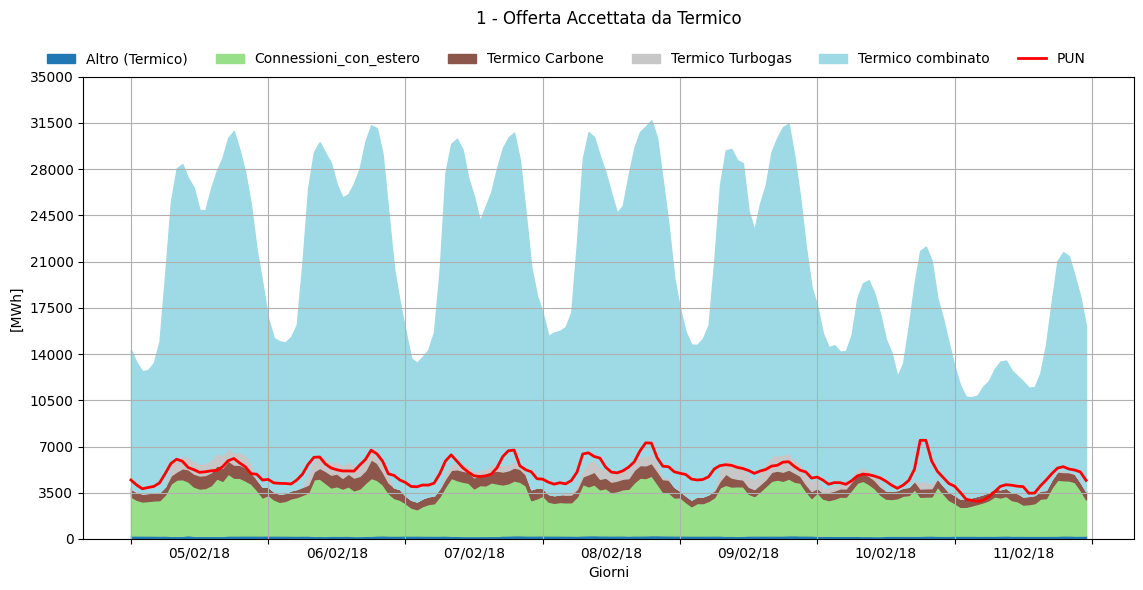

In [91]:
import matplotlib.ticker as ticker
import numpy as np

# PLOT OFFERTA -- Grafico impilato
hours = 24 * 7
x_labels = formatted_days

plot_class_Ter = plot_class_off[plot_class_off["MACRO CLASSE"].isin(["Termico"])]

# Creazione della tabella pivot per classificazione TERNA e assegnazione dei valori in GWh
df_pivot = plot_class_Ter.pivot(index=['DAY', 'INTERVAL_NO', 'INTERVAL_NO_Key'], columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO')
df_pivot = df_pivot.fillna(0)  # Riempire i NaN con 0 per evitare errori nel grafico

# Calcolo della media di PUN per ciascun intervallo
PUN_mean = df_class_off.groupby(['DAY', 'INTERVAL_NO'])['AWARDED_PRICE_NO'].mean()

# Prepariamo il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea un array di colori per ciascuna serie di CLASSIFICAZIONE TERNA
colors = plt.cm.tab20(np.linspace(0, 1, len(df_pivot.columns)))

# Traccia le aree per ogni classificazione di terna con impilamento
bottom_area = np.zeros(hours)
for i, classification in enumerate(df_pivot.columns):
    series_values = df_pivot[classification].values / 1000  # Dividere per 1 milione per avere i GWh
    ax1.fill_between(range(hours), bottom_area, bottom_area + series_values, label=classification, color=colors[i])
    bottom_area += series_values  # Aggiorna l'area inferiore per la prossima serie

# Traccia la linea rossa della media PUN
PUN_mean_values = PUN_mean.values
ax1.plot(range(hours), PUN_mean_values, color='red', linewidth=2, label='PUN')

# Configurazione degli assi con valori allineati
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[MWh]')

# Sincronizzare i limiti degli assi y impostando gli stessi limiti e ticks
max_gwh = 35000  # Massimo per asse y sinistro
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(0, max_gwh)
ax1.set_yticks(np.linspace(0, max_gwh, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere la legenda in alto, disattivando il bordo
ax1.legend(loc='upper center', bbox_to_anchor=(0.46, 1.08), ncol=6, frameon=False)

# Allineare le griglie degli assi y e x
ax1.grid(True)
# Nascondere i tick minor usati per posizionare le label
ax1.tick_params(axis='x', which='minor', bottom=False)

# Aggiunta del titolo e layout
plt.title('1 - Offerta Accettata da Termico', pad=38)
plt.tight_layout()

# Salva la grafico come immagine
plt.savefig('3_1_OFFERTA_ACCETTATA.png')
plt.show()


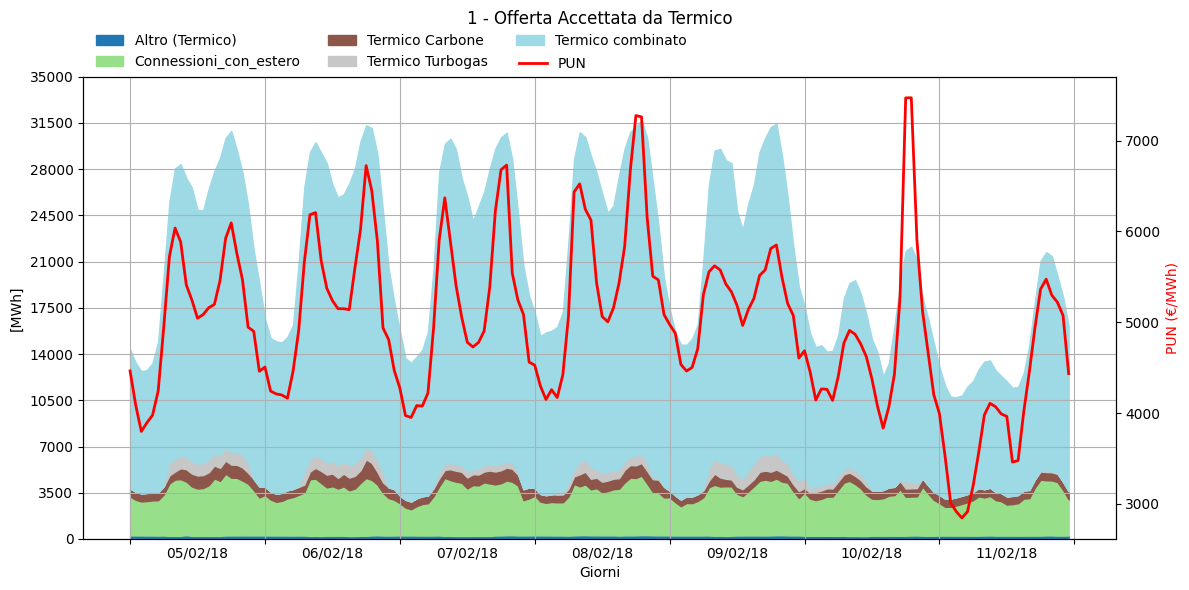

In [92]:
# PLOT OFFERTA -- Grafico impilato
hours = 24 * 7
x_labels = formatted_days

plot_class_Ter = plot_class_off[plot_class_off["MACRO CLASSE"].isin(["Termico"])]

# Creazione della tabella pivot per classificazione TERNA e assegnazione dei valori in MWh
df_pivot = plot_class_Ter.pivot(index=['DAY', 'INTERVAL_NO', 'INTERVAL_NO_Key'], columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO')
df_pivot = df_pivot.fillna(0)  # Riempire i NaN con 0 per evitare errori nel grafico

# Prepariamo il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea un array di colori per ciascuna serie di CLASSIFICAZIONE TERNA
colors = plt.cm.tab20(np.linspace(0, 1, len(df_pivot.columns)))

# Traccia le aree per ogni classificazione di terna con impilamento
bottom_area = np.zeros(hours)
for i, classification in enumerate(df_pivot.columns):
    series_values = df_pivot[classification].values / 1000  # Dividere per 1000 per avere i MWh
    ax1.fill_between(range(hours), bottom_area, bottom_area + series_values, label=classification, color=colors[i])
    bottom_area += series_values  # Aggiorna l'area inferiore per la prossima serie

# Configurazione degli assi con valori allineati
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[MWh]')

# Sincronizzare i limiti degli assi y impostando gli stessi limiti e ticks
max_gwh = 35000  # Massimo per asse y sinistro
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(0, max_gwh)
ax1.set_yticks(np.linspace(0, max_gwh, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere la legenda in alto, disattivando il bordo
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.12), ncol=3, frameon=False)

# Allineare le griglie degli assi y e x
ax1.grid(True)
# Nascondere i tick minor usati per posizionare le label
ax1.tick_params(axis='x', which='minor', bottom=False)

# --- Aggiunta della serie PUN (media di AWARDED_PRICE_NO) su asse destro ---
# Calcolare la media di AWARDED_PRICE_NO per ogni intervallo temporale (INTERVAL_NO_Key)
pun_mean = df_class_off.groupby(['DAY', 'INTERVAL_NO'])['AWARDED_PRICE_NO'].mean()

# Crea il secondo asse per PUN
ax2 = ax1.twinx()

# Plotta la serie PUN (in rosso) sul secondo asse
ax2.plot(range(hours), pun_mean.values, color='red', label='PUN', linewidth=2)

# Configura l'asse y destro
ax2.set_ylabel('PUN (€/MWh)', color='red')
ax2.tick_params(axis='y', labelcolor='black')

# Aggiungere la legenda per il secondo asse (PUN)
ax2.legend(loc='upper left', bbox_to_anchor=(0.41, 1.07), ncol=1, frameon=False)

# Aggiunta del titolo e layout
plt.title('1 - Offerta Accettata da Termico', pad=38)
plt.tight_layout()

# Salva il grafico come immagine
plt.savefig('3_1_OFFERTA_ACCETTATA.png')
plt.show()


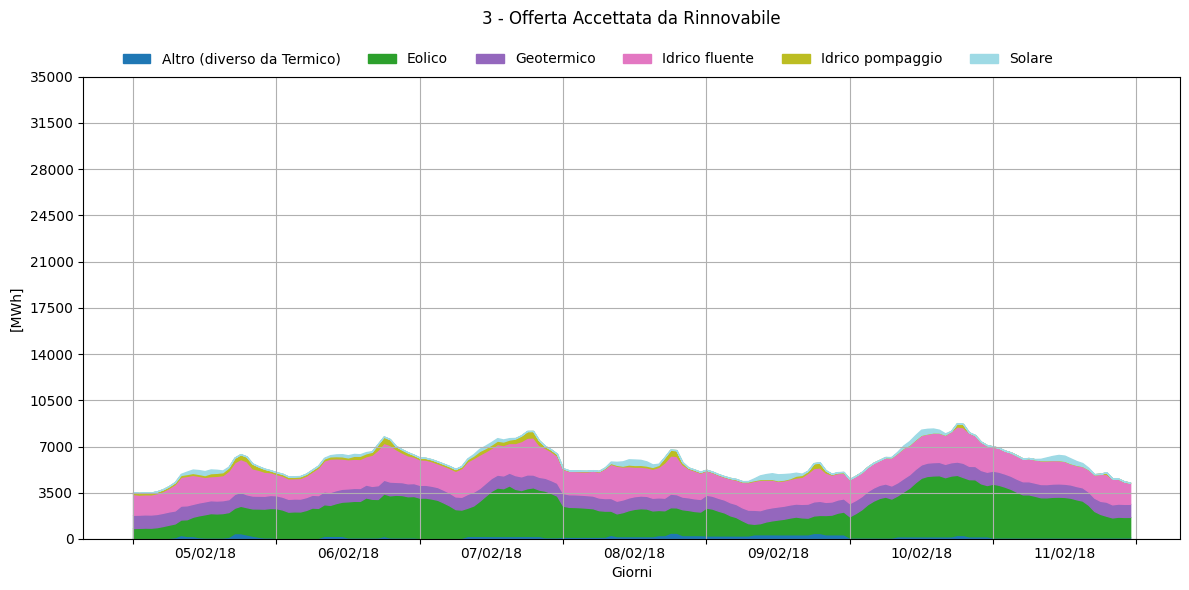

In [93]:
# PLOT Rinnovabile -- Grafico impilato
hours = 24 * 7
x_labels = formatted_days
plot_class_Rin = plot_class_off[plot_class_off["MACRO CLASSE"].isin(["Rinnovabile"])]
# Creazione della tabella pivot per classificazione TERNA e assegnazione dei valori in GWh
df_pivot = plot_class_Rin.pivot(index=['DAY','INTERVAL_NO','INTERVAL_NO_Key'], columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO')
df_pivot = df_pivot.fillna(0)  # Riempire i NaN con 0 per evitare errori nel grafico
# Prepariamo il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea un array di colori per ciascuna serie di CLASSIFICAZIONE TERNA
colors = plt.cm.tab20(np.linspace(0, 1, len(df_pivot.columns)))

# Traccia le aree per ogni classificazione di terna con impilamento
bottom_area = np.zeros(hours)
for i, classification in enumerate(df_pivot.columns):
    series_values = df_pivot[classification].values / 1000  # Dividere per 1 milione per avere i GWh
    ax1.fill_between(range(hours), bottom_area, bottom_area + series_values, label=classification, color=colors[i])
    bottom_area += series_values  # Aggiorna l'area inferiore per la prossima serie

# Configurazione degli assi con valori allineati
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[MWh]')

# Sincronizzare i limiti degli assi y impostando gli stessi limiti e ticks
max_gwh = 35000  # Massimo per asse y sinistro
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(0, max_gwh)
ax1.set_yticks(np.linspace(0, max_gwh, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere la legenda in alto, disattivando il bordo
ax1.legend(loc='upper center', bbox_to_anchor=(0.46, 1.08), ncol=6, frameon=False)

# Allineare le griglie degli assi y e x
ax1.grid(True)
# Nascondere i tick minor usati per posizionare le label
ax1.tick_params(axis='x', which='minor', bottom=False)

# Aggiunta del titolo e layout
plt.title('3 - Offerta Accettata da Rinnovabile', pad=38)
plt.tight_layout()
# Salva la grafico come immagine
plt.savefig('3_3_OFFERTA_ACCETTATA.png')
plt.show()



In [94]:
#Tabbella Andamento Termico
#data = {
 #   'Offerta': ['TWh'],
  #  KPI_class_off['CLASSIFICAZIONE TERNA']:KPI_class_off['AWARDED_QUANTITY_NO']
#}
KPI_class_off_Ter = KPI_class_off[KPI_class_off['MACRO CLASSE'] == 'Termico']
pivot_table = KPI_class_off_Ter.pivot_table(index=None,columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO[TWh]')
pivot_table.insert(0, 'OFFERTA', 'TWh')
new_row = {'OFFERTA': '%'}
indcol = 0
for col in KPI_class_off_Ter['CLASSIFICAZIONE TERNA']:
    new_row[col] = KPI_class_off_Ter['%'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)
WoWKPI_class_off_Ter = WoWKPI_class_off[WoWKPI_class_off['MACRO CLASSE'] == 'Termico']
new_row = {'OFFERTA': 'wow'}
indcol = 0
for col in WoWKPI_class_off_Ter['CLASSIFICAZIONE TERNA']:
    new_row[col] = WoWKPI_class_off_Ter['wow'].iloc[indcol]
    indcol = indcol + 1
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)
YoYKPI_class_off_Ter = YoYKPI_class_off[YoYKPI_class_off['MACRO CLASSE'] == 'Termico']
new_row = {'OFFERTA': 'yoy'}
indcol = 0
for col in YoYKPI_class_off_Ter['CLASSIFICAZIONE TERNA']:
    new_row[col] = YoYKPI_class_off_Ter['YoY'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)


# Crea il DataFrame
TAB_class_off_Ter = pd.DataFrame(pivot_table)
TAB_class_off_Ter['Totale'] = [KPITot_qt_off,KPITot_p_off,WoWAvg_class_off,YoYAvg_class_off]
#print(TAB_class_off)

def style_columns(df):
    # Usa il metodo `style` di Pandas per formattare la tabella e arrotondare i numeri
    styled_df = df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#2a66c7'), ('color', 'white'), ('font-weight', 'bold')]}]
    ).hide(axis="index")

    # Arrotonda le celle a 2 decimali nella visualizzazione
    styled_df = styled_df.format(precision=2)

    return styled_df
# Mostra la tabella formattata
styleTAB_class_off = style_columns(TAB_class_off_Ter)
styleTAB_class_off

OFFERTA,Altro (Termico),Connessioni_con_estero,Termico Carbone,Termico Turbogas,Termico combinato,Totale
TWh,0.04,0.56,0.12,0.07,2.82,5.48
%,0.78,10.22,2.19,1.30,51.48,100.00
wow,0.03,-0.24,0.09,0.52,3.15,0.21
yoy,0.11,3.64,-1.02,1.11,-1.76,0.22


In [95]:
#Tabbella Andamento Rinnovabile
#data = {
 #   'Offerta': ['TWh'],
  #  KPI_class_off['CLASSIFICAZIONE TERNA']:KPI_class_off['AWARDED_QUANTITY_NO']
#}
KPI_class_off_Rin = KPI_class_off[KPI_class_off['MACRO CLASSE'] == 'Rinnovabile']
pivot_table = KPI_class_off_Rin.pivot_table(index=None,columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO[TWh]')
pivot_table.insert(0, 'OFFERTA', 'TWh')
new_row = {'OFFERTA': '%'}
indcol = 0
for col in KPI_class_off_Rin['CLASSIFICAZIONE TERNA']:
    new_row[col] = KPI_class_off_Rin['%'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)
WoWKPI_class_off_Rin = WoWKPI_class_off[WoWKPI_class_off['MACRO CLASSE'] == 'Rinnovabile']
new_row = {'OFFERTA': 'wow'}
indcol = 0
for col in WoWKPI_class_off_Rin['CLASSIFICAZIONE TERNA']:
    new_row[col] = WoWKPI_class_off_Rin['wow'].iloc[indcol]
    indcol = indcol + 1
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)
YoYKPI_class_off_Rin = YoYKPI_class_off[YoYKPI_class_off['MACRO CLASSE'] == 'Rinnovabile']
new_row = {'OFFERTA': 'yoy'}
indcol = 0
for col in YoYKPI_class_off_Rin['CLASSIFICAZIONE TERNA']:
    new_row[col] = YoYKPI_class_off_Rin['YoY'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)


# Crea il DataFrame
TAB_class_off_Rin = pd.DataFrame(pivot_table)
TAB_class_off_Rin['Totale'] = [KPITot_qt_off,KPITot_p_off,WoWAvg_class_off,YoYAvg_class_off]
#print(TAB_class_off)

def style_columns(df):
    # Usa il metodo `style` di Pandas per formattare la tabella e arrotondare i numeri
    styled_df = df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#2a66c7'), ('color', 'white'), ('font-weight', 'bold')]}]
    ).hide(axis="index")

    # Arrotonda le celle a 2 decimali nella visualizzazione
    styled_df = styled_df.format(precision=2)

    return styled_df
# Mostra la tabella formattata
styleTAB_class_off = style_columns(TAB_class_off_Rin)
styleTAB_class_off

OFFERTA,Altro (diverso da Termico),Eolico,Geotermico,Idrico fluente,Idrico pompaggio,Solare,Totale
TWh,0.03,0.41,0.17,0.35,0.02,0.01,5.48
%,0.59,7.44,3.04,6.36,0.38,0.27,100.00
wow,0.21,-1.14,-0.09,0.19,-0.50,0.04,0.21
yoy,-0.23,1.75,0.11,0.37,0.25,0.07,0.22


In [97]:
#Report Download
from google.colab import files
TAB_class_off_Ter.to_csv('3_2_OFFERTA_ACCETTATA.csv', index=False)
#Scarica il file Excel
files.download('3_2_OFFERTA_ACCETTATA.csv')

TAB_class_off_Rin.to_csv('3_4_OFFERTA_ACCETTATA.csv', index=False)
#Scarica il file Excel
files.download('3_4_OFFERTA_ACCETTATA.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>